<a href="https://colab.research.google.com/github/chajmz/Dataquest/blob/master/Scrapping_Examiners_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pandas.io.json import json_normalize    
from datetime import datetime
from datetime import date
from google.colab import drive

In [53]:
url = 'https://www.patentbots.com/stats/art-unit/3647'
response = requests.get(url)
response

<Response [200]>

In [54]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup

def scrapArtUnitExaminers(num):
  url = 'https://www.patentbots.com/stats/art-unit/'+str(num)
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    td = soup.findAll('td')
    pattern = r'[0-9]*[-]([\w-]*)\"'
    l2 = []
    for i in range(0,len(td),3):
      line_str = str(td[i].contents[0])
      if 'examiner/' in line_str:
        name = re.search(pattern, line_str).group(1).replace('-',' ')
        num_case = int(td[i+1].contents[0])
        grant = str(td[i+2].contents[0])
        l2.append([name,num_case,grant])
    df = pd.DataFrame(l2,columns=['examiner','num_case','percent_grant'])
    df['art_unit'] = num
    return df

df = scrapArtUnitExaminers(3644)
df

,examiner,num_case,percent_grant,art_unit
0,ABBOTT LEWIS YVONNE RENEE,506,85%,3644
1,ABELL TYE W,0,0%,3644
2,COLLINS TIMOTHY D,11,18%,3644
3,DAVIS RICHARD G,324,71%,3644
4,DIXON KEITH L,232,75%,3644
5,ELLIS CHRISTOPHER P,378,89%,3644
6,FILOSI TERRI L,4,0%,3644
7,KREINER MICHAEL B,205,87%,3644
8,MCFALL NICHOLAS A,223,87%,3644
9,NGUYEN TRINH T,391,65%,3644


In [55]:
import json

def getSmallChartDataUnit(unit):
  url = 'https://www.patentbots.com/stats/art-unit/' + str(unit) 
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    comp = soup.findAll('script',attrs = {'id':'comparison-data'})
    for row in comp:
      df = pd.DataFrame(json.loads(row.string),columns=['group','percent_grant_num','3ygr','percent_grant'])
    df['art_unit'] = int(unit)
    return df


def getBigChartDataUnit(unit):
  url = 'https://www.patentbots.com/stats/art-unit/' + str(unit) 
  response = requests.get(url)
  if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")
    comp2 = soup.findAll('script',attrs = {'id':'timeline-data'})
    for row in comp2:
      df =  pd.DataFrame(json.loads(row.string),columns=['months','comment','granted','pending','abandoned'])
    df['art_unit'] = int(unit)
    
    sum_all = df['granted'] + df['pending'] + df['abandoned']
    df['p_grant'] = round(df['granted']/sum_all,2)
    df['p_pending'] = round(df['pending']/sum_all,2)
    df['p_abandoned'] = round(df['abandoned']/sum_all,2)
    return df


abc =  getBigChartDataUnit(3644)
abc.sample(10)

,months,comment,granted,pending,abandoned,art_unit,p_grant,p_pending,p_abandoned
27,27,None,3993,331,1064,3644,0.74,0.06,0.20
26,26,None,4020,361,1059,3644,0.74,0.07,0.19
13,13,None,3910,1493,893,3644,0.62,0.24,0.14
36,36,3Y Grant Rate,3576,118,1027,3644,0.76,0.02,0.22
31,31,None,3845,209,1055,3644,0.75,0.04,0.21
15,15,None,4024,1169,956,3644,0.65,0.19,0.16
32,32,None,3799,186,1046,3644,0.76,0.04,0.21
20,20,None,4110,683,1011,3644,0.71,0.12,0.17
34,34,None,3720,142,1046,3644,0.76,0.03,0.21
3,3,None,869,5981,26,3644,0.13,0.87,0.00


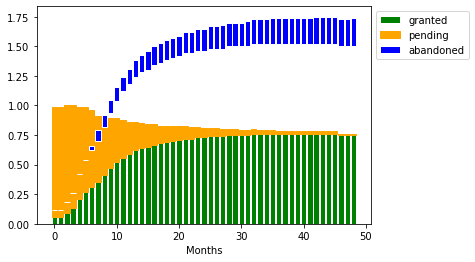

In [56]:
import numpy as np
import matplotlib.pyplot as plt
barWidth = 0.85
# Create green Bars
plt.bar(abc['months'], abc['p_grant'], color='green', edgecolor='white', width=barWidth,label='granted')
# Create orange Bars
plt.bar(abc['months'], abc['p_pending'],bottom = abc['p_grant'], color='orange', edgecolor='orange', width=barWidth,label='pending')
plt.bar(abc['months'], abc['p_abandoned'],bottom=[i+j for i,j in zip(abc['p_grant'], abc['p_grant'])], color='blue', edgecolor='white', width=barWidth,label='abandoned')
 
# Custom x axis
plt.xlabel("Months")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()

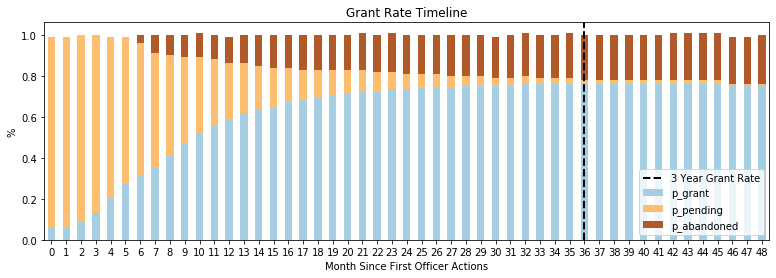

In [57]:
from matplotlib import cm

def getGraphUnit(df):
  cmap = cm.get_cmap('Paired')
  ax = df[['p_grant','p_pending','p_abandoned']].plot(kind="bar", stacked=True,legend=True,figsize=(13,4),colormap=cmap)
  ax.axvline(x=36,linewidth=2, color='black', ls='--',label='3 Year Grant Rate')
  ax.set_xlabel('Month Since First Officer Actions')
  ax.set_ylabel('%')
  ax.set_title('Grant Rate Timeline')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
  ax.legend()

getGraphUnit(abc)

In [58]:
list_art = ['3661', '3667', '3663', '3646', '3662', '3648', '3664', '3668', '3669',
       '3665', '2689', '3745', '2685', '3741', '2684', '2612', '3644', '2836',
       '2872', '2835', '3753', '2649', '2683', '2845', '2855', '2613', '2682',
       '2686', '2856', '2687', '3647', '2618', '2842', '2623', '2831', '2632',
       '2913', '2627', '2857', '2474', '2631', '3645', '2837', '2647', '2838',
       '2697', '3749', '2665', '2681', '2834', '3653', '2821', '3657', '2113',
       '1776', '3658']

list_art2 = ['3661', '3667','3662', '3648', '3664', '3668', '3669',
       '3665', '2689', '3745','2685', '3741', '2684', '2612', '3644', '2836',
       '2872', '2835', '3753', '2649','2683', '2845', '2855', '2613']

merged_stats_art = pd.concat([getBigChartDataUnit(int(l)) for l in list_art])
merged_stats_art.sample(6)


,months,comment,granted,pending,abandoned,art_unit,p_grant,p_pending,p_abandoned
37,37,None,11146,325,2562,2837,0.79,0.02,0.18
7,7,None,1619,4209,294,2647,0.26,0.69,0.05
16,16,None,7901,3026,2493,3753,0.59,0.23,0.19
24,24,None,3849,478,556,3663,0.79,0.10,0.11
5,5,None,1065,5155,2,2647,0.17,0.83,0.00
17,17,None,1629,1008,432,2618,0.53,0.33,0.14


In [59]:
import datetime
merged_examiners = pd.concat([scrapArtUnitExaminers(int(l)) for l in list_art])
merged_examiners.sample(5)
print("Time required",(datetime.datetime.now() - now))

Time required 0:05:38.169591


In [0]:
list_all = [1611, 1612, 1615, 1616, 1617, 1618, 1619, 1621, 1622, 1624, 1625, 1626, 1629, 1631, 1632, 1633, 1634, 1636, 1637, 1639, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1652, 1653, 1654, 1655, 1656, 1657, 1661, 1662, 1671, 1673, 1674, 1675, 1676, 1677, 1678, 1711, 1713, 1714, 1715, 1716, 1717, 1722, 1725, 1726, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1757, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1771, 1772, 1774, 1775, 1776, 1778, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1791, 1792, 1796, 1797, 1798, 1799, 2112, 2113, 2115, 2117, 2121, 2123, 2126, 2129, 2131, 2139, 2143, 2144, 2161, 2176, 2183, 2184, 2185, 2189, 2192, 2193, 2194, 2195, 2196, 2414, 2422, 2425, 2431, 2447, 2465, 2479, 2482, 2484, 2486, 2489, 2611, 2612, 2613, 2621, 2622, 2627, 2631, 2636, 2642, 2649, 2651, 2652, 2653, 2654, 2656, 2657, 2658, 2661, 2668, 2673, 2677, 2681, 2683, 2684, 2686, 2688, 2691, 2763, 2782, 2783, 2785, 2811, 2812, 2813, 2814, 2818, 2822, 2823, 2826, 2827, 2828, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2842, 2843, 2844, 2845, 2847, 2848, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2871, 2872, 2874, 2875, 2876, 2877, 2878, 2879, 2881, 2882, 2883, 2884, 2891, 2892, 2893, 2894, 2895, 2911, 2912, 2913, 2914, 2918, 3611, 3612, 3616, 3617, 3618, 3619, 3622, 3623, 3625, 3626, 3627, 3628, 3629, 3632, 3633, 3634, 3636, 3637, 3641, 3643, 3644, 3645, 3646, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3661, 3663, 3664, 3671, 3672, 3673, 3674, 3676, 3677, 3678, 3679, 3685, 3689, 3693, 3711, 3714, 3715, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3751, 3752, 3753, 3754, 3761, 3762, 3763, 3765, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3779, 3781, 3782]

In [61]:
import datetime
now = datetime.datetime.now()
l2 = [x for x in range(1500,4000)]
m_exam =  pd.concat([scrapArtUnitExaminers(int(l)) for l in l2])
m_exam.shape
print("Time required",(datetime.datetime.now() - now))

export_csv = df.to_csv (r'C:\Users\Ron\Desktop\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

Time required 0:03:29.803605


In [0]:
m_exam.shape
m_exam['prefix_art'] = round(m_exam['art_unit']/100,0)

In [63]:
m_exam[m_exam['examiner'] == "LUU CUONG V"]

,examiner,num_case,percent_grant,art_unit,prefix_art
10,LUU CUONG V,132,64%,2128,21.0
6,LUU CUONG V,25,44%,2129,21.0
7,LUU CUONG V,142,84%,2192,22.0


In [0]:
export_csv = m_exam.to_csv(r'/datalab/file.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [68]:
m_exam.shape

(9072, 5)

In [0]:
m_exam['percent_grant_value'] = m_exam['percent_grant'].str.replace("%","").astype(int)

# **Best Art Unit**
Let's identify the Art Unit with the best percent grant as a average of all the examiner working in this art unit


In [0]:
all_art_unit = m_exam['art_unit'].unique()
l_art_mean = []
for unit in all_art_unit:
  examiners = m_exam[m_exam.art_unit == unit]
  l_art_mean.append([unit,round(examiners['percent_grant_value'].mean(),1),examiners['percent_grant_value'].shape[0]])
  
df_top_art_unit = pd.DataFrame(l_art_mean,columns=['art_unit','mean_grant_exam','num_exams'])
df_top_art_unit['prefix_art'] = round(df_top_art_unit['art_unit']/100,0)

In [103]:
df_top_art_unit.sample(5)

,art_unit,mean_grant_exam,num_exams,prefix_art
451,3677,61.4,17,37.0
251,2612,58.4,17,26.0
43,1662,62.2,13,17.0
437,3661,73.8,19,37.0
452,3678,53.3,17,37.0


Text(0.5, 1.0, 'Art Unit Granting Rate')

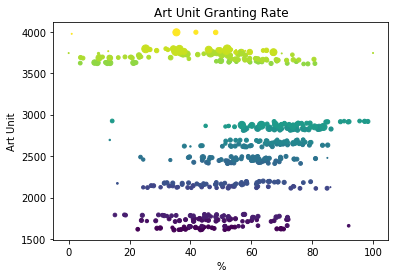

In [122]:
colors = {16 :"AA", 17 : "vb", 18 : "dd", 21 : "zqd", 22 : "dzqd", 24:"qdqd", 25:"dqdq", 26:'dzqd', 27:"dqdq", 28:"dzdzqd", 29:"dzdq", 36:"dzdq", 37:"dzqdqzd",
       38 : " dzqdzq", 40 : " dzadad"}
ax = plt.scatter(df_top_art_unit.mean_grant_exam, df_top_art_unit.art_unit, s=df_top_art_unit.num_exams,c=df_top_art_unit.prefix_art, label=colors)
plt.ylabel('Art Unit')
plt.xlabel('%')
plt.title('Art Unit Granting Rate')

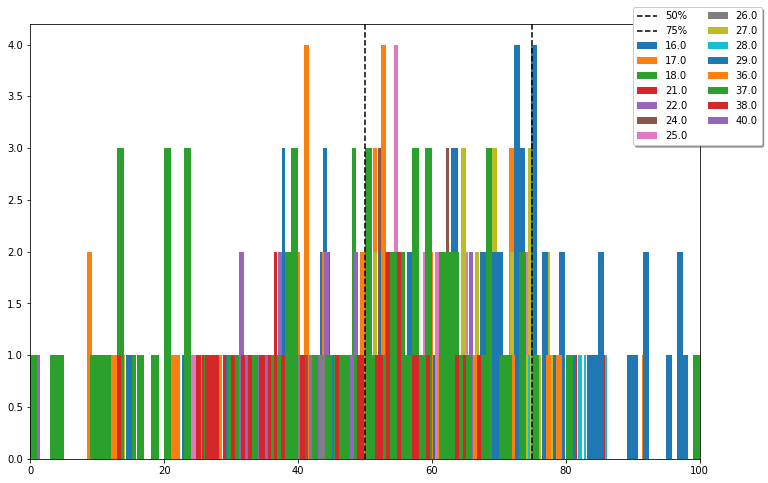

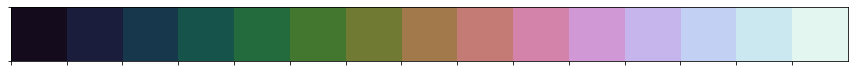

In [153]:
fig,ax = plt.subplots(figsize=(12,8))
pal = sns.palplot(sns.color_palette("cubehelix", len(df_top_art_unit['prefix_art'].unique())))

for c in df_top_art_unit['prefix_art'].unique():
  ax.hist(df_top_art_unit[df_top_art_unit['prefix_art'] == c]['mean_grant_exam'], bins=100,label=str(c))
ax.set(xlim=(0, 100))
ax.axvline(x=50,ls='--', label='50%',c='black')
ax.axvline(x=75,ls='--', label='75%',c='black')
ax.legend(bbox_to_anchor=(1.1, 1.05),fancybox=True, shadow=True,ncol=2)

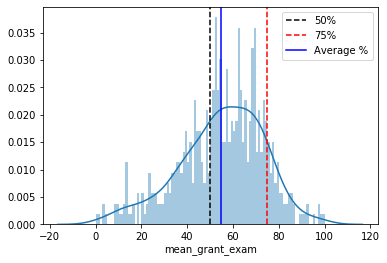

In [162]:
ax = sns.distplot(df_top_art_unit['mean_grant_exam'],bins=100,color=pal)
ax.axvline(x=50,ls='--', label='50%',c='black')
ax.axvline(x=75,ls='--', label='75%',c='r')
ax.axvline(x=df_top_art_unit['mean_grant_exam'].mean(), label='Average %',c='blue')

ax.legend()